<H1>MADATORY PYTHON LIBRARIES</H1>

In [1]:
%matplotlib  inline
import xarray
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap
import numpy as np
plt.rcParams.update({'font.size': 15})

<h1>IN SITU DRIFTERS</h1>

In Situ 'drifters' comprehends a 2 kinds of drifting buoys: drifting buoys reporting currents (DC) and drifting buoys (DB). These moving platforms provides data time series of certain parameters along its trajectory/over time. It's platform data types are: DB & DC.

<h1>PLOTING LAGRANGIAN TIME SERIES</h1>

Imagine you have downloaded some <i>_TS_ (time serie)</i> dataset from In Situ drifters (see how to download files froma  certain [platform data source](https://github.com/CopernicusMarineInsitu/INSTACTraining-Phase2UPDATE/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_data_source.ipynb) or [platform category](https://github.com/CopernicusMarineInsitu/INSTACTraining-Phase2UPDATE/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_category.ipynb)) like: [MO_TS_DC_0-2820800.nc](ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/history/drifter/MO_TS_DC_0-2820800.nc)

In [2]:
dataset = 'MO_TS_DC_0-2820800.nc'

Let's have a look to its content:

In [3]:
full_path2file = os.getcwd()+'/'+dataset #default to current directory
print('path2file: %s'%(full_path2file))

path2file: /home/protllan/code/Training/INSTACTraining-PhaseII/PythonNotebooks/MO_TS_DC_0-2820800.nc


In [4]:
ds = xarray.open_dataset(dataset)

ds contains all the information about the dataset (relevant metadata, variables, dimensions etc):

In [5]:
ds

<xarray.Dataset>
Dimensions:          (DEPTH: 1, LATITUDE: 142, LONGITUDE: 142, POSITION: 142, TIME: 142)
Coordinates:
  * LONGITUDE        (LONGITUDE) float64 9.715 9.723 9.73 9.741 9.756 9.768 ...
  * LATITUDE         (LATITUDE) float64 43.83 43.83 43.82 43.82 43.81 43.81 ...
  * TIME             (TIME) datetime64[ns] 2017-09-26T15:00:00 ...
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    EWCT             (TIME, DEPTH) float64 10.0 0.05808 0.06806 0.09422 ...
    NSCT             (TIME, DEPTH) float64 10.0 -0.07387 -0.05337 -0.03517 ...
    DEPH             (TIME, DEPTH) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TIME_QC          (TIME) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    EWCT_QC          (TIME, DEPTH) float64 4.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    NSCT_QC          (TIME, DEPTH) float64 4.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    DEPH_QC          (TIME, DEPTH) float64 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 ...
    POSITION_QC      (POSITION) float64

In [6]:
ds.variables.keys()

[u'LONGITUDE',
 u'LATITUDE',
 u'TIME',
 u'EWCT',
 u'NSCT',
 u'DEPH',
 u'TIME_QC',
 u'EWCT_QC',
 u'NSCT_QC',
 u'DEPH_QC',
 u'POSITION_QC',
 u'EWCT_DM',
 u'NSCT_DM',
 u'DEPH_DM',
 u'DROGUE_PRESENCE']

Every of the above parameters varies along certain dimensions (within parenthesis when checking the parameter metadata):

In [7]:
print(ds['EWCT'].long_name)
print(ds['EWCT'].units)
print(ds['EWCT'].dims)

West-east current component
m s-1
(u'TIME', u'DEPTH')


Every of the above variables have a corresponding '_QC' variable, which is the variable that contains the data quality flags:

In [15]:
print(ds['EWCT_QC'].flag_values)
print(ds['EWCT_QC'].flag_meanings)

[0 1 2 3 4 5 6 7 8 9]
no_qc_performed good_data probably_good_data bad_data_that_are_potentially_correctable bad_data value_changed not_used nominal_value interpolated_value missing_value


Let's plot the drifter lagrangian trajectory:

In [18]:
lonmin = min(ds['LONGITUDE'].values.tolist())
lonmax = max(ds['LONGITUDE'].values.tolist())
latmin = min(ds['LATITUDE'].values.tolist())
latmax = max(ds['LATITUDE'].values.tolist())
print([lonmax, lonmin, latmax, latmin])

[10.24947738647461, 9.714666366577148, 43.834083557128906, 42.766170501708984]


In [19]:
m = Basemap(projection='merc', llcrnrlat=latmin-5, urcrnrlat=latmax+5,llcrnrlon=lonmin-5, urcrnrlon=lonmax+10, resolution='i')

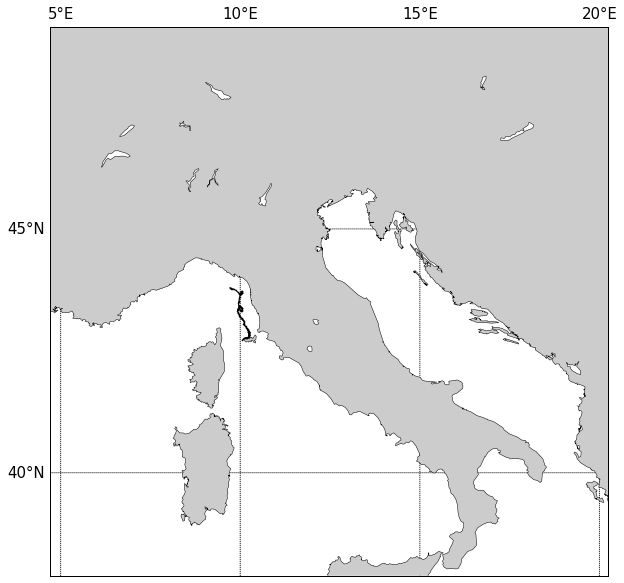

In [20]:
fig = plt.figure(figsize=(10,10))
x, y = m(ds['LONGITUDE'].values.tolist(), ds['LATITUDE'].values.tolist())
m.plot(x,y,marker='o',color='k', ms=1)

m.drawcoastlines(linewidth=0.5, zorder=3)
m.fillcontinents(zorder=2)

m.drawparallels(np.arange(-90.,91.,5.), labels=[1,0,0,0], zorder=1)
m.drawmeridians(np.arange(-180.,181.,5.), labels=[0,0,1,0], zorder=1)

plt.show()

Let's zoom and plot now a lagrangian time serie (i.e current):

In [21]:
cmap = plt.cm.Spectral_r
norm = colors.Normalize(vmin=ds['EWCT'].min().values.tolist(), vmax=ds['EWCT'].max().values.tolist())

<ul><li>cmap=cmap sets the colormap (see more <a href="https://matplotlib.org/examples/color/colormaps_reference.html" targte="_blank">here</a>)</li>
<li>norm=norm sets the limits for the color scale; in this case: the max min values of the variable whose lagrangian time serie we want to plot </li></ul>

In [22]:
m = Basemap(projection='merc', llcrnrlat=latmin-1, urcrnrlat=latmax+1,llcrnrlon=lonmin-1, urcrnrlon=lonmax+1, resolution='i')

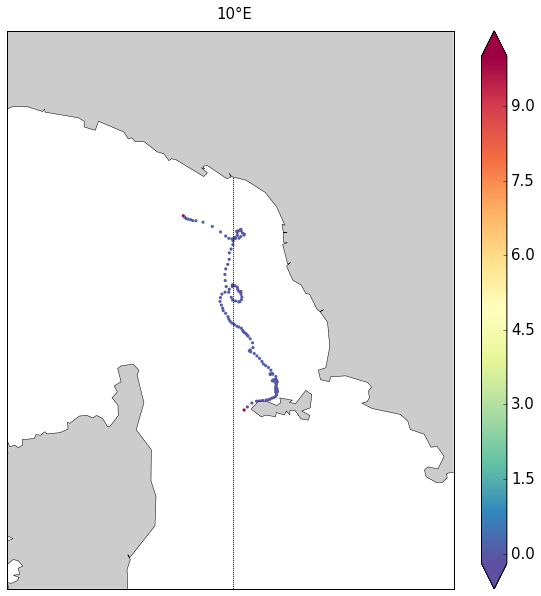

In [23]:
fig = plt.figure(figsize=(10,10))
x, y = m(ds['LONGITUDE'].values.tolist(), ds['LATITUDE'].values.tolist())
ax = plt.subplot(111)
m.scatter(x, y, s=10, c=ds['EWCT'], edgecolor='None', cmap=cmap, norm=norm)
m.drawcoastlines(linewidth=0.5, zorder=3)
m.fillcontinents(zorder=2)
m.drawparallels(np.arange(-90.,91.,5.), labels=[1,0,0,0], zorder=1)
m.drawmeridians(np.arange(-180.,181.,5.), labels=[0,0,1,0], zorder=1)
plt.colorbar(extend='both', cmap=cmap, norm=norm)
ax.set_aspect('auto')
plt.show()

Its seems we have an outlier (maxima of 9 m/s?); let's skip it with _QC variable:

In [24]:
cmap = plt.cm.Spectral_r
norm = colors.Normalize(vmin=ds['EWCT'].where(ds['EWCT_QC'] == 1).min().values.tolist(), vmax=ds['EWCT'].where(ds['EWCT_QC'] == 1).max().values.tolist())

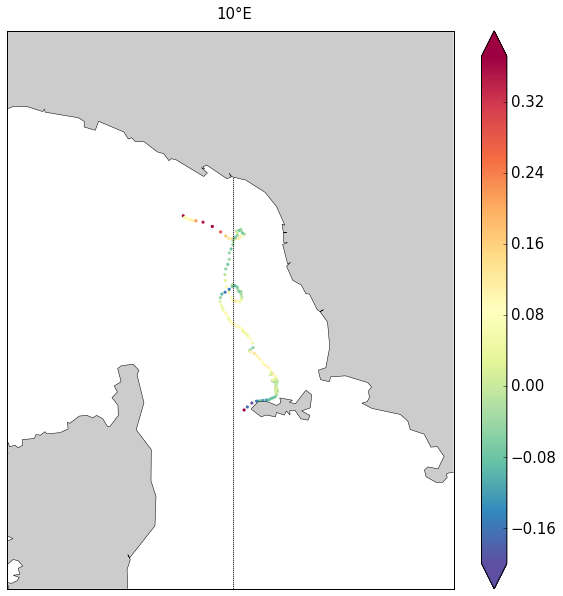

In [25]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
m.scatter(x, y, s=10, c=ds['EWCT'], edgecolor='None', cmap=cmap, norm=norm)
m.drawcoastlines(linewidth=0.5, zorder=3)
m.fillcontinents(zorder=2)
m.drawparallels(np.arange(-90.,91.,5.), labels=[1,0,0,0], zorder=1)
m.drawmeridians(np.arange(-180.,181.,5.), labels=[0,0,1,0], zorder=1)
plt.colorbar(extend='both', cmap=cmap, norm=norm)
ax.set_aspect('auto')
plt.show()